Group Name: PBJ

Members:
1. Poulami Ghosh
2. Bramantyo Ibrahim Supriyatno
3. Julie Morgan

In [1]:
import keras 

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD
from keras.layers import Input, Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.models import Model

from tensorflow.keras import initializers

import math

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
NUM_CLASSES = 10

In [5]:
X_train = X_train.reshape((X_train.shape[0],28,28,1))
X_test = X_test.reshape((X_test.shape[0],28,28,1))

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [6]:
batch_size = 100
num_epochs_1 = int(math.ceil(10000 / ( X_train.shape[0]/batch_size)))
num_epochs_2 = int(math.ceil(20000 / ( X_train.shape[0]/batch_size)))

<b>Model 1</b>

In [7]:
input_layer = Input(shape=(28,28,1))

x = Flatten()(input_layer)

output_layer = Dense(units = NUM_CLASSES, activation='softmax')(x)

In [8]:
model1 = Model(input_layer, output_layer)

In [9]:
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
opt = SGD(learning_rate=0.5)

model1.compile(
    loss='categorical_crossentropy', 
    optimizer=opt,
    metrics=['accuracy'])

In [11]:
model1_hist = model1.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test),
    batch_size=batch_size, 
    epochs=num_epochs_1)

Epoch 1/17
600/600 [==============================] - 2s 3ms/step - loss: 0.3920 - accuracy: 0.8872 - val_loss: 0.3029 - val_accuracy: 0.9145
Epoch 2/17
600/600 [==============================] - 1s 2ms/step - loss: 0.3061 - accuracy: 0.9125 - val_loss: 0.2912 - val_accuracy: 0.9155
Epoch 3/17
600/600 [==============================] - 1s 2ms/step - loss: 0.2920 - accuracy: 0.9179 - val_loss: 0.2838 - val_accuracy: 0.9215
Epoch 4/17
600/600 [==============================] - 1s 2ms/step - loss: 0.2846 - accuracy: 0.9202 - val_loss: 0.2761 - val_accuracy: 0.9221
Epoch 5/17
600/600 [==============================] - 1s 2ms/step - loss: 0.2787 - accuracy: 0.9213 - val_loss: 0.2787 - val_accuracy: 0.9195
Epoch 6/17
600/600 [==============================] - 1s 2ms/step - loss: 0.2755 - accuracy: 0.9221 - val_loss: 0.2828 - val_accuracy: 0.9189
Epoch 7/17
600/600 [==============================] - 1s 2ms/step - loss: 0.2729 - accuracy: 0.9241 - val_loss: 0.2772 - val_accuracy: 0.9232
Epoch 

<b> Model 2</b>

In [12]:
input_layer = Input(shape=(28,28,1))

x = Flatten()(input_layer)

x = Dense(
    units=1500,
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1),
    activation='relu')(x)

x = Dense(
    units=1500,
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1),
    activation='relu')(x)

x = Dense(
    units=1500,
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1),
    activation='relu')(x)

output_layer = Dense(
    units = NUM_CLASSES, 
    activation='softmax',
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1))(x)

In [13]:
model2 = Model(input_layer, output_layer)
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1500)              1177500   
_________________________________________________________________
dense_2 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dense_3 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                15010     
Total params: 5,695,510
Trainable params: 5,695,510
Non-trainable params: 0
_________________________________________________

In [14]:
opt_adam = Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model2.compile(
    loss='categorical_crossentropy', 
    optimizer=opt_adam,
    metrics=['accuracy'])

In [15]:
model2_hist = model2.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test),
    batch_size=batch_size, 
    epochs=num_epochs_2)

Epoch 1/34
600/600 [==============================] - 4s 7ms/step - loss: 0.2363 - accuracy: 0.9265 - val_loss: 0.1137 - val_accuracy: 0.9655
Epoch 2/34
600/600 [==============================] - 4s 6ms/step - loss: 0.0929 - accuracy: 0.9715 - val_loss: 0.1099 - val_accuracy: 0.9660
Epoch 3/34
600/600 [==============================] - 4s 6ms/step - loss: 0.0640 - accuracy: 0.9804 - val_loss: 0.0902 - val_accuracy: 0.9746
Epoch 4/34
600/600 [==============================] - 4s 6ms/step - loss: 0.0494 - accuracy: 0.9847 - val_loss: 0.0799 - val_accuracy: 0.9792
Epoch 5/34
600/600 [==============================] - 4s 7ms/step - loss: 0.0386 - accuracy: 0.9885 - val_loss: 0.0748 - val_accuracy: 0.9803
Epoch 6/34
600/600 [==============================] - 4s 7ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.0762 - val_accuracy: 0.9816
Epoch 7/34
600/600 [==============================] - 4s 7ms/step - loss: 0.0305 - accuracy: 0.9909 - val_loss: 0.0739 - val_accuracy: 0.9819
Epoch 

<b> Model 3 </b>

In [16]:
input_layer = Input(shape=(28,28,1))

x = Flatten()(input_layer)

x = Dense(
    units=1500,
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1),
    activation='relu')(x)

x = Dropout(rate=0.5)(x)

x = Dense(
    units=1500,
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1),
    activation='relu')(x)

x = Dropout(rate=0.5)(x)

x = Dense(
    units=1500,
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1),
    activation='relu')(x)

x = Dropout(rate=0.5)(x)

output_layer = Dense(
    units = NUM_CLASSES, 
    activation='softmax',
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1))(x)

In [17]:
model3 = Model(input_layer, output_layer)
model3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1500)              1177500   
_________________________________________________________________
dropout (Dropout)            (None, 1500)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1500)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1500)              2251

In [18]:
opt_adam = Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model3.compile(
    loss='categorical_crossentropy', 
    optimizer=opt_adam,
    metrics=['accuracy'])

In [19]:
model3_hist = model3.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test),
    batch_size=batch_size, 
    epochs=num_epochs_2)

Epoch 1/34
600/600 [==============================] - 4s 7ms/step - loss: 0.3032 - accuracy: 0.9045 - val_loss: 0.1256 - val_accuracy: 0.9629
Epoch 2/34
600/600 [==============================] - 4s 7ms/step - loss: 0.1574 - accuracy: 0.9536 - val_loss: 0.0897 - val_accuracy: 0.9731
Epoch 3/34
600/600 [==============================] - 4s 7ms/step - loss: 0.1300 - accuracy: 0.9625 - val_loss: 0.0945 - val_accuracy: 0.9724
Epoch 4/34
600/600 [==============================] - 4s 7ms/step - loss: 0.1103 - accuracy: 0.9682 - val_loss: 0.0785 - val_accuracy: 0.9780
Epoch 5/34
600/600 [==============================] - 4s 7ms/step - loss: 0.1077 - accuracy: 0.9700 - val_loss: 0.0946 - val_accuracy: 0.9733
Epoch 6/34
600/600 [==============================] - 4s 7ms/step - loss: 0.0989 - accuracy: 0.9723 - val_loss: 0.0756 - val_accuracy: 0.9805
Epoch 7/34
600/600 [==============================] - 4s 7ms/step - loss: 0.0918 - accuracy: 0.9738 - val_loss: 0.0706 - val_accuracy: 0.9811
Epoch 

<b> Model 4 </b>

In [20]:
input_layer = Input(shape=(28,28,1))

x = Conv2D(
    filters=32,
    kernel_size = 5, 
    strides = 1, 
    padding='same',
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1))(input_layer)

x = MaxPooling2D(
    pool_size=2,
    strides=2)(x)

x = Conv2D(
    filters=64,
    kernel_size = 5, 
    strides = 1, 
    padding='same',
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1))(x)

x = MaxPooling2D(
    pool_size=2,
    strides=2)(x)

x = Flatten()(x)

output_layer = Dense(
    units = NUM_CLASSES, 
    activation='softmax',
    kernel_initializer=initializers.TruncatedNormal(mean=0, stddev=0.01),
    bias_initializer=initializers.Constant(value=0.1))(x)

In [21]:
model4 = Model(input_layer, output_layer)
model4.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                3137

In [22]:
opt_adam = Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model4.compile(
    loss='categorical_crossentropy', 
    optimizer=opt_adam,
    metrics=['accuracy'])

In [23]:
model4_hist = model4.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test),
    batch_size=batch_size, 
    epochs=num_epochs_2)

Epoch 1/34
600/600 [==============================] - 5s 9ms/step - loss: 0.2907 - accuracy: 0.9094 - val_loss: 0.0758 - val_accuracy: 0.9773
Epoch 2/34
600/600 [==============================] - 5s 9ms/step - loss: 0.0720 - accuracy: 0.9787 - val_loss: 0.0514 - val_accuracy: 0.9831
Epoch 3/34
600/600 [==============================] - 5s 9ms/step - loss: 0.0557 - accuracy: 0.9826 - val_loss: 0.0480 - val_accuracy: 0.9846
Epoch 4/34
600/600 [==============================] - 5s 9ms/step - loss: 0.0455 - accuracy: 0.9858 - val_loss: 0.0453 - val_accuracy: 0.9845
Epoch 5/34
600/600 [==============================] - 5s 8ms/step - loss: 0.0421 - accuracy: 0.9865 - val_loss: 0.0441 - val_accuracy: 0.9860
Epoch 6/34
600/600 [==============================] - 5s 8ms/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0402 - val_accuracy: 0.9867
Epoch 7/34
600/600 [==============================] - 5s 8ms/step - loss: 0.0307 - accuracy: 0.9895 - val_loss: 0.0484 - val_accuracy: 0.9839
Epoch 

In [25]:
import matplotlib.pyplot as plt
import numpy as np

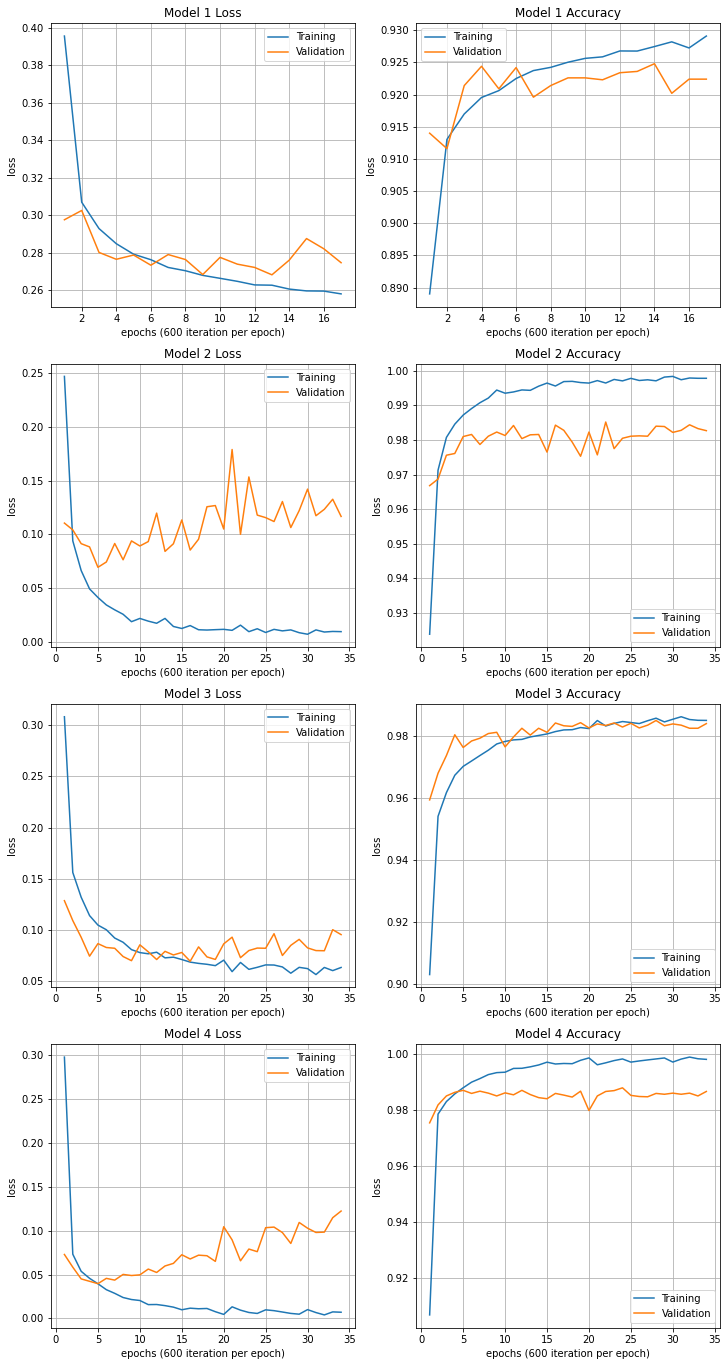

In [26]:
fig,axs = plt.subplots(4,2, figsize=(12,24))

x = np.arange(1,len(model1_hist.history['loss'])+1,1)
axs[0,0].set_title('Model 1 Loss')
axs[0,0].plot(x, model1_hist.history['loss'], label='Training')
axs[0,0].plot(x, model1_hist.history['val_loss'], label='Validation')
axs[0,0].set_xlabel('epochs (600 iteration per epoch)')
axs[0,0].set_ylabel('loss')
axs[0,0].legend()
axs[0,0].grid()

axs[0,1].set_title('Model 1 Accuracy')
axs[0,1].plot(x, model1_hist.history['accuracy'], label='Training')
axs[0,1].plot(x, model1_hist.history['val_accuracy'], label='Validation')
axs[0,1].set_xlabel('epochs (600 iteration per epoch)')
axs[0,1].set_ylabel('loss')
axs[0,1].legend()
axs[0,1].grid()

x = np.arange(1,len(model2_hist.history['loss'])+1,1)
axs[1,0].set_title('Model 2 Loss')
axs[1,0].plot(x, model2_hist.history['loss'], label='Training')
axs[1,0].plot(x, model2_hist.history['val_loss'], label='Validation')
axs[1,0].set_xlabel('epochs (600 iteration per epoch)')
axs[1,0].set_ylabel('loss')
axs[1,0].legend()
axs[1,0].grid()

axs[1,1].set_title('Model 2 Accuracy')
axs[1,1].plot(x, model2_hist.history['accuracy'], label='Training')
axs[1,1].plot(x, model2_hist.history['val_accuracy'], label='Validation')
axs[1,1].set_xlabel('epochs (600 iteration per epoch)')
axs[1,1].set_ylabel('loss')
axs[1,1].legend()
axs[1,1].grid()

axs[2,0].set_title('Model 3 Loss')
axs[2,0].plot(x, model3_hist.history['loss'], label='Training')
axs[2,0].plot(x, model3_hist.history['val_loss'], label='Validation')
axs[2,0].set_xlabel('epochs (600 iteration per epoch)')
axs[2,0].set_ylabel('loss')
axs[2,0].legend()
axs[2,0].grid()

axs[2,1].set_title('Model 3 Accuracy')
axs[2,1].plot(x, model3_hist.history['accuracy'], label='Training')
axs[2,1].plot(x, model3_hist.history['val_accuracy'], label='Validation')
axs[2,1].set_xlabel('epochs (600 iteration per epoch)')
axs[2,1].set_ylabel('loss')
axs[2,1].legend()
axs[2,1].grid()

axs[3,0].set_title('Model 4 Loss')
axs[3,0].plot(x, model4_hist.history['loss'], label='Training')
axs[3,0].plot(x, model4_hist.history['val_loss'], label='Validation')
axs[3,0].set_xlabel('epochs (600 iteration per epoch)')
axs[3,0].set_ylabel('loss')
axs[3,0].legend()
axs[3,0].grid()

axs[3,1].set_title('Model 4 Accuracy')
axs[3,1].plot(x, model4_hist.history['accuracy'], label='Training')
axs[3,1].plot(x, model4_hist.history['val_accuracy'], label='Validation')
axs[3,1].set_xlabel('epochs (600 iteration per epoch)')
axs[3,1].set_ylabel('loss')
axs[3,1].legend()
axs[3,1].grid()

In [27]:
m1_train = model1.evaluate(X_train, y_train, verbose=2)
m1_valid = model1.evaluate(X_test, y_test, verbose=2)

1875/1875 - 4s - loss: 0.2482 - accuracy: 0.9312
313/313 - 1s - loss: 0.2718 - accuracy: 0.9245


In [28]:
m2_train = model2.evaluate(X_train, y_train, verbose=2)
m2_valid = model2.evaluate(X_test, y_test, verbose=2)

1875/1875 - 4s - loss: 0.0035 - accuracy: 0.9989
313/313 - 1s - loss: 0.1092 - accuracy: 0.9852


In [29]:
m3_train = model3.evaluate(X_train, y_train, verbose=2)
m3_valid = model3.evaluate(X_test, y_test, verbose=2)

1875/1875 - 4s - loss: 0.0116 - accuracy: 0.9973
313/313 - 1s - loss: 0.0737 - accuracy: 0.9846


In [30]:
m4_train = model4.evaluate(X_train, y_train, verbose=2)
m4_valid = model4.evaluate(X_test, y_test, verbose=2)

1875/1875 - 5s - loss: 0.0045 - accuracy: 0.9986
313/313 - 2s - loss: 0.0945 - accuracy: 0.9855
